In [157]:
#Import the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 

# to filter out the warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)

In [158]:
#load data
loan_data_df = pd.read_csv("loan.csv")

In [159]:
#check number of rows and columns
loan_data_df.shape

(39717, 111)

In [160]:
# get info of data frame to see how many entries, and types of data types
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


Analyze various columns, rows for null, data types i.e cleaning and transformation

In [161]:
# check the columns having missing values
loan_data_df.isnull().sum()


id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [162]:
#total count of such columns which have missing values 
# total entries were 39717 and we can see there are columns having all values missing
loan_data_df.isnull().all(axis=0).sum()

54

In [163]:
#Remove all such columns i.e axis=1
loan_data_df.dropna(axis = 1, how = 'all', inplace = True)

In [164]:
#check number of rows and columns again and can see out of 111now we are left with 57 columns
loan_data_df.shape

(39717, 57)

In [165]:
#seeing the columns in csv it seems there are columns which might not be required for analysis
# e.g id, url, tax_liens, desc, mths_since_last_delinq, mths_since_last_record, next_pymnt_d
columns_not_required=["id", "url", "tax_liens", 
                      "desc", "mths_since_last_delinq", "mths_since_last_record", 
                      "next_pymnt_d", "collection_recovery_fee", "policy_code"]
loan_data_df.drop(labels=columns_not_required, axis=1, inplace=True)

In [166]:
#check number of rows and columns again and can see out of 57 now we are left with 50 columns
loan_data_df.shape

(39717, 48)

In [167]:
loan_data_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies
0,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0
1,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0
2,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0
3,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0
4,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,May-16,67.79,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0


In [168]:
loan_data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   member_id                   39717 non-null  int64  
 1   loan_amnt                   39717 non-null  int64  
 2   funded_amnt                 39717 non-null  int64  
 3   funded_amnt_inv             39717 non-null  float64
 4   term                        39717 non-null  object 
 5   int_rate                    39717 non-null  object 
 6   installment                 39717 non-null  float64
 7   grade                       39717 non-null  object 
 8   sub_grade                   39717 non-null  object 
 9   emp_title                   37258 non-null  object 
 10  emp_length                  38642 non-null  object 
 11  home_ownership              39717 non-null  object 
 12  annual_inc                  39717 non-null  float64
 13  verification_status         397

In [169]:
#emp_length column seems to have null values and character + also, clean it (can be used in analysis)
loan_data_df.emp_length.fillna('0', inplace=True)
loan_data_df['emp_length'] = loan_data_df.emp_length.str.extract('(\d+)')

In [170]:
#emp_titile column seems to have null values , clean it (can be used in analysis)
loan_data_df.emp_title.fillna('NA', inplace=True)

In [171]:
# pub_rec_bankruptcies column seems to have null values , clean it (can be used in analysis)
loan_data_df.pub_rec_bankruptcies.isnull().sum()

# fillna with 0
loan_data_df.pub_rec_bankruptcies.fillna('0.0',inplace=True)

In [172]:
# int_rate & revol_util have %, clean it (can be used in analysis)
loan_data_df['int_rate'] = loan_data_df['int_rate'].str.rstrip('%')
loan_data_df['revol_util'] = loan_data_df['revol_util'].str.rstrip('%')

In [173]:
# convert following column froms object to int as might require in analysis
# loan_amnt, funded_amnt, int_rate,funded_amnt_inv,installment,annual_inc,dti,emp_length,total_pymnt
columns_object_to_int=['loan_amnt','funded_amnt',
                       'funded_amnt_inv','int_rate',
                       'installment','emp_length',
                       'annual_inc','dti','total_pymnt']
loan_data_df[columns_object_to_int] = loan_data_df[columns_object_to_int].apply(pd.to_numeric)

In [174]:
loan_data_df.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
initial_li

In [175]:
# As ongoing loan is an ok/in-progress loan , so lets remove from analysis dataframe
loan_data_df = loan_data_df[loan_data_df.loan_status != "Current"]

#print unique values to check
loan_data_df.loan_status.unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

Get outliers out

<Axes: ylabel='annual_inc'>

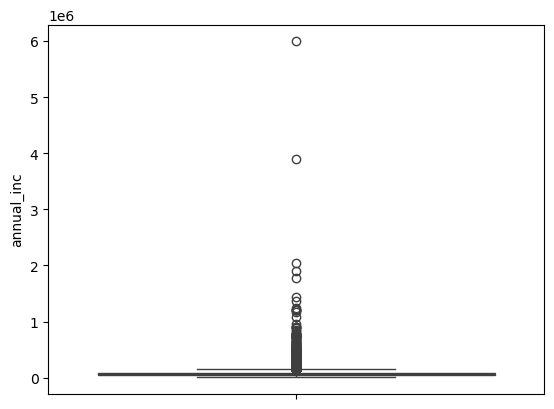

In [176]:
# check for annual income for outliers
sns.boxplot(loan_data_df['annual_inc'])

In [177]:
loan_data_df["annual_inc"].describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [178]:
# Removing annual income outlier , values beyond 95 percentile or above can be removed
quantile_loan_dataframe_info = loan_data_df.annual_inc.quantile([0.5, 0.75,0.90, 0.95, 0.99])
#quantile_loan_dataframe_info

loan_data_df = loan_data_df[loan_data_df["annual_inc"] <= loan_data_df["annual_inc"].quantile(0.95)]

In [179]:
loan_data_df["annual_inc"].describe()

count     36654.000000
mean      60855.751621
std       27750.284125
min        4000.000000
25%       40000.000000
50%       56000.000000
75%       77970.500000
max      140004.000000
Name: annual_inc, dtype: float64

<Axes: ylabel='annual_inc'>

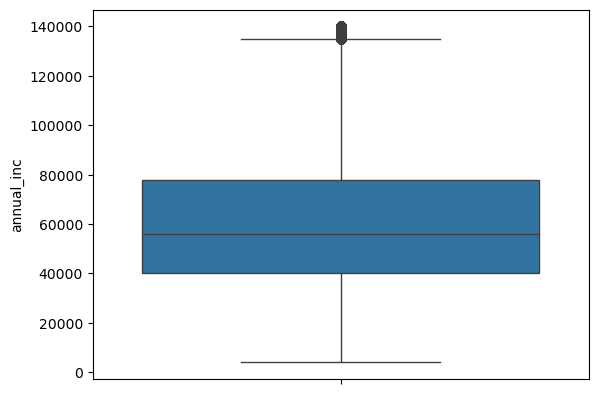

In [180]:
# after removing outliers (annual_inc)
sns.boxplot(loan_data_df.annual_inc)

<Axes: ylabel='loan_amnt'>

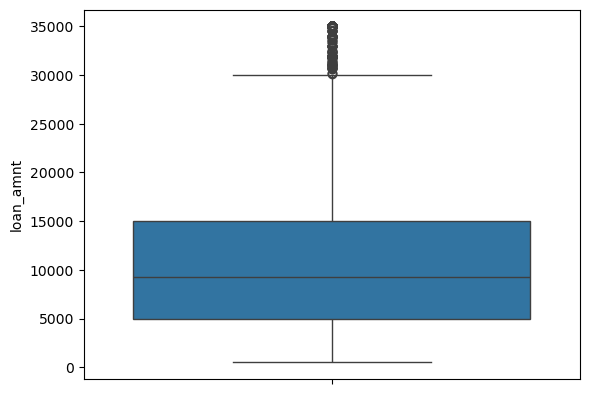

In [181]:
# before removing outliers (loan_amnt)
sns.boxplot(loan_data_df.loan_amnt)

In [182]:
# check for loan_amnt for outliers on similar lines of annual_income and remove outlier above 95 percentile
quantile_loanAmount_dataframe_info = loan_data_df["loan_amnt"].quantile([0.5, 0.75,0.90, 0.95, 0.99])
quantile_loanAmount_dataframe_info

#loan_data_df = loan_data_df[loan_data_df["loan_amnt"] <= loan_data_df["loan_amnt"].quantile(0.95)]

0.50     9250.0
0.75    15000.0
0.90    20000.0
0.95    25000.0
0.99    35000.0
Name: loan_amnt, dtype: float64

<Axes: ylabel='loan_amnt'>

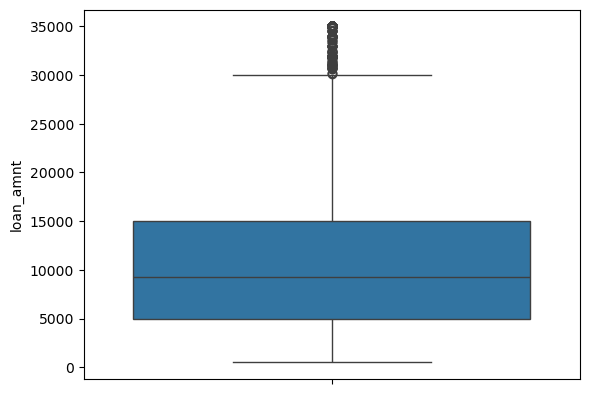

In [183]:
#After removing outliers
sns.boxplot(loan_data_df.loan_amnt)

In [184]:
#validate outliers in other numerical values which could be used in analysis like int_rate, total_pymnt

#Finally check the columns now after cleanup, removing outliers
loan_data_df.isnull().sum()


member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
pymnt_plan                     0
purpose                        0
title                         11
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    48
total_acc                      0
initial_li

Till here we have cleaned, transformed the data (removing null values, removing unwanted columns, standardizing data/datatypes, removing outliers) to make it fit for EDA. Also in the target variable "loan_status" we have removed unwanted value of ("current"/In-progress) i.e only now "Fully-Paid" & "Charged-Off" are the value in "loan_status"

Now we can start on EDA with 
- Univariate
- Segmented Univariate
- Bivariate

Univariate Analysis

We'll analyze various single variables/columns to understand how the data is organized in terms of count for following like
- Loan Status 
- grades and subgrades
- employee length(tenure)
- loan amount
- loan term
- interest rates
- loan verification status
- Home ownership
- annual income breakups, 
- verification status
- purpose for which loan was taken
- Loan Status & month issued
- Loan Status & year issued

LoanStatus

<Axes: xlabel='loan_status', ylabel='count'>

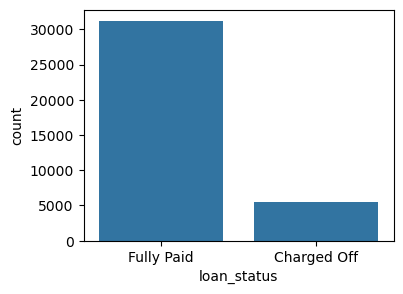

In [185]:
# see the count plot for loan_status
plt.figure(figsize=(4,3))
sns.countplot(x = 'loan_status', data = loan_data_df)
#sns.barplot(x = 'loan_status', data = loan_data_df)

Observation (Loan Status) : Quite a bit of loans have been charged off out of the total loan issues and we need to analyze factor which are effecting these loans to be charged off

Grades & Subgrades

<Axes: xlabel='grade', ylabel='count'>

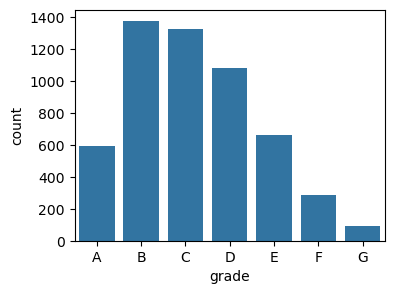

In [186]:
# see the count plot for grades for which loans have been charged off
plt.figure(figsize=(4,3))
sns.countplot(x = 'grade', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'] , 
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'])

Count plot for grades with subgrades hue for charged off loans

<Axes: xlabel='grade', ylabel='count'>

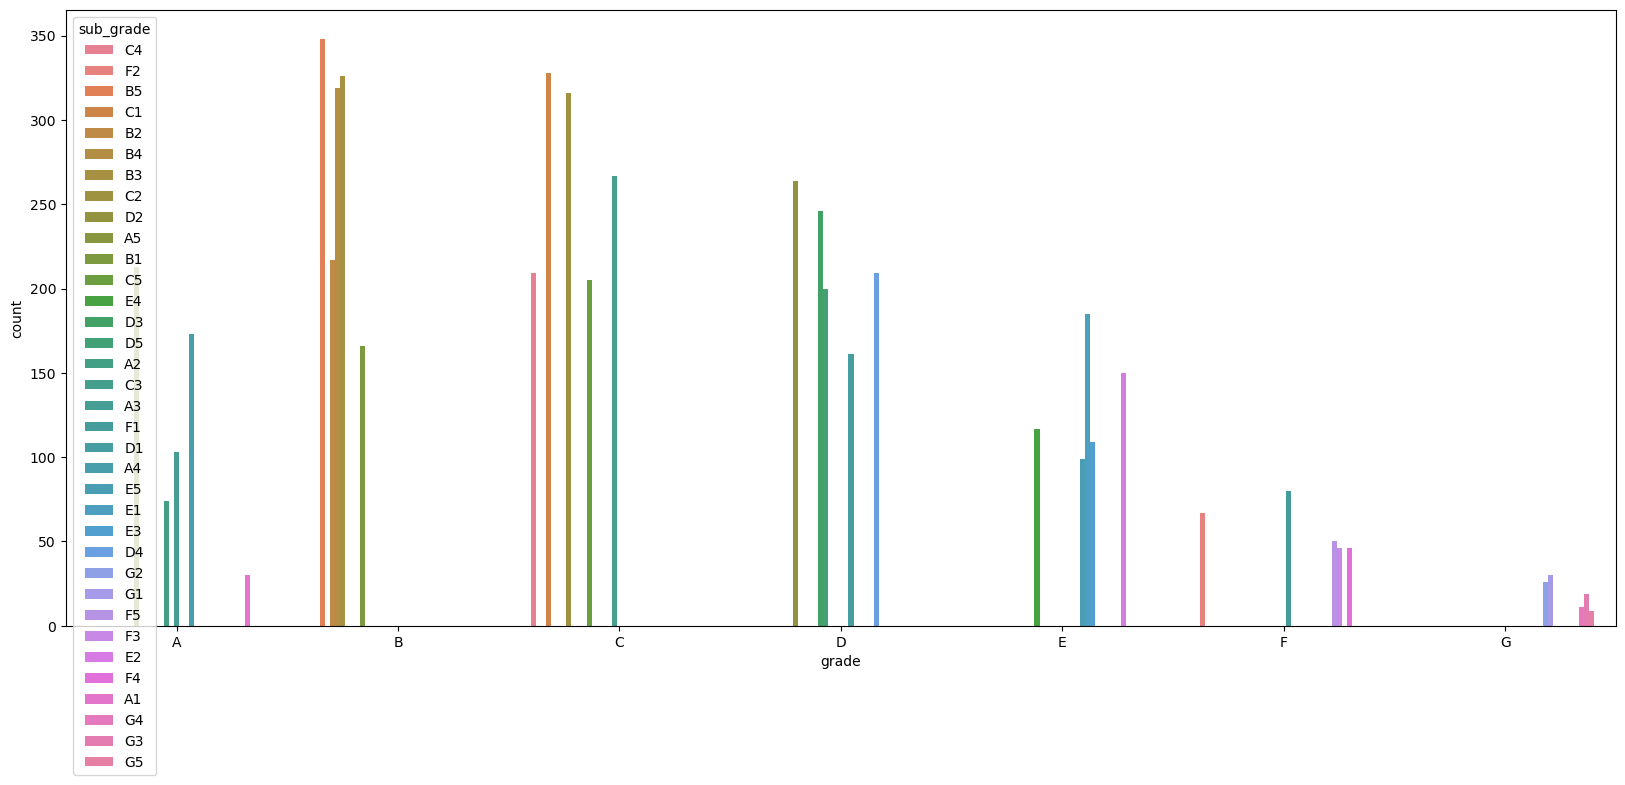

In [187]:
# see the count plot for grades with subgrades hue for charged off loans
plt.figure(figsize=(20,8))
sns.countplot(x = 'grade', hue='sub_grade', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'], 
              order = ['A', 'B', 'C', 'D', 'E', 'F', 'G'] )

<Axes: xlabel='sub_grade', ylabel='count'>

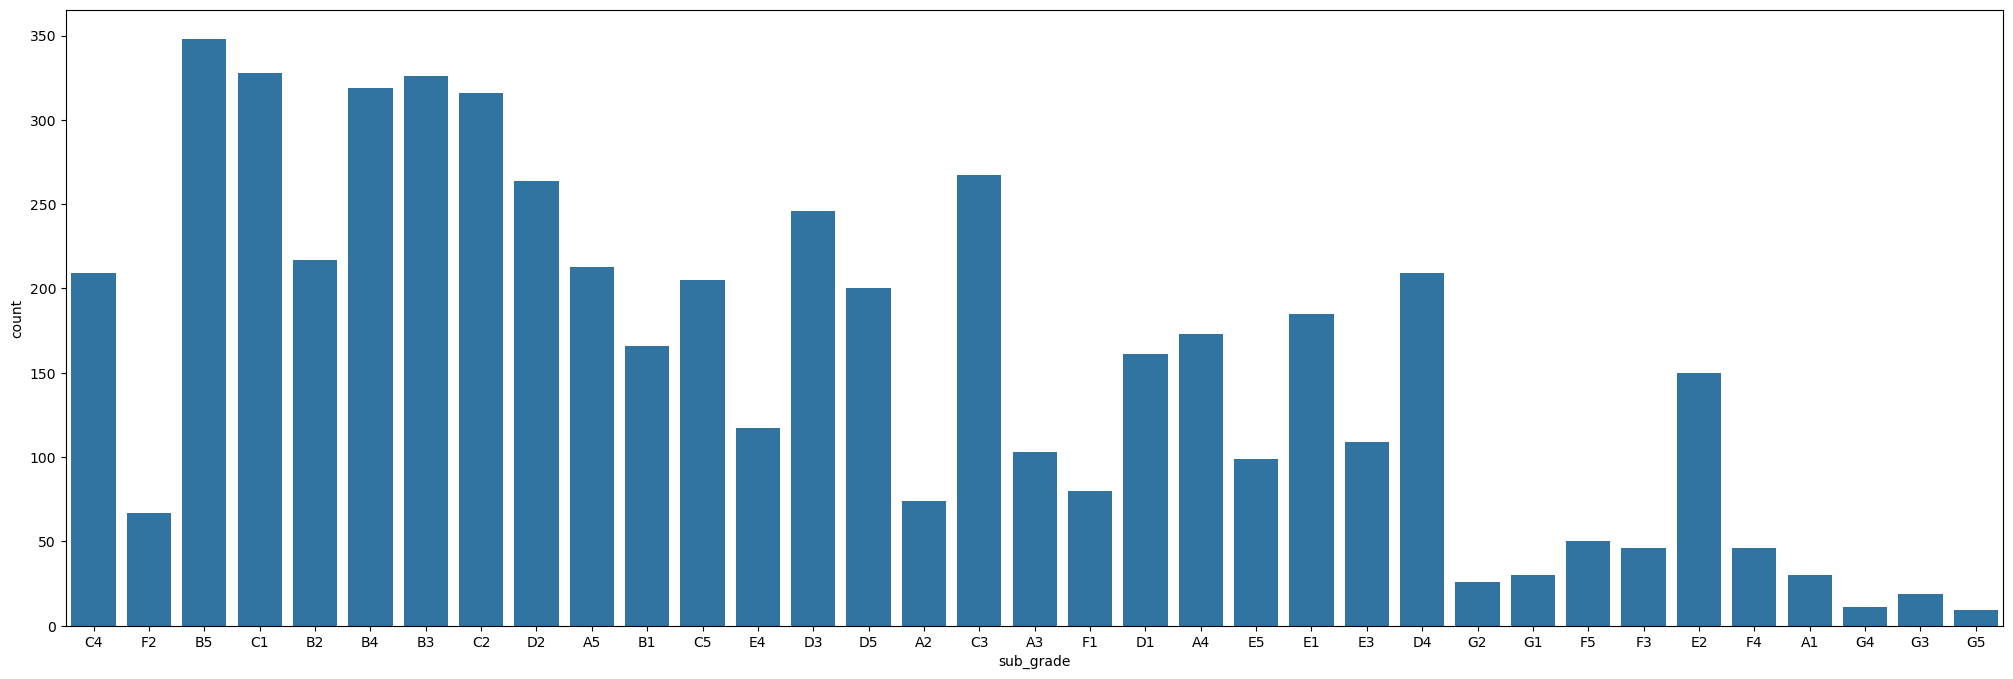

In [188]:
# see the count plot for sub-grades
fig, ax = plt.subplots(figsize = (25,8))
sns.countplot(x = 'sub_grade', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])

Sub-Grades w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='sub_grade', ylabel='count'>

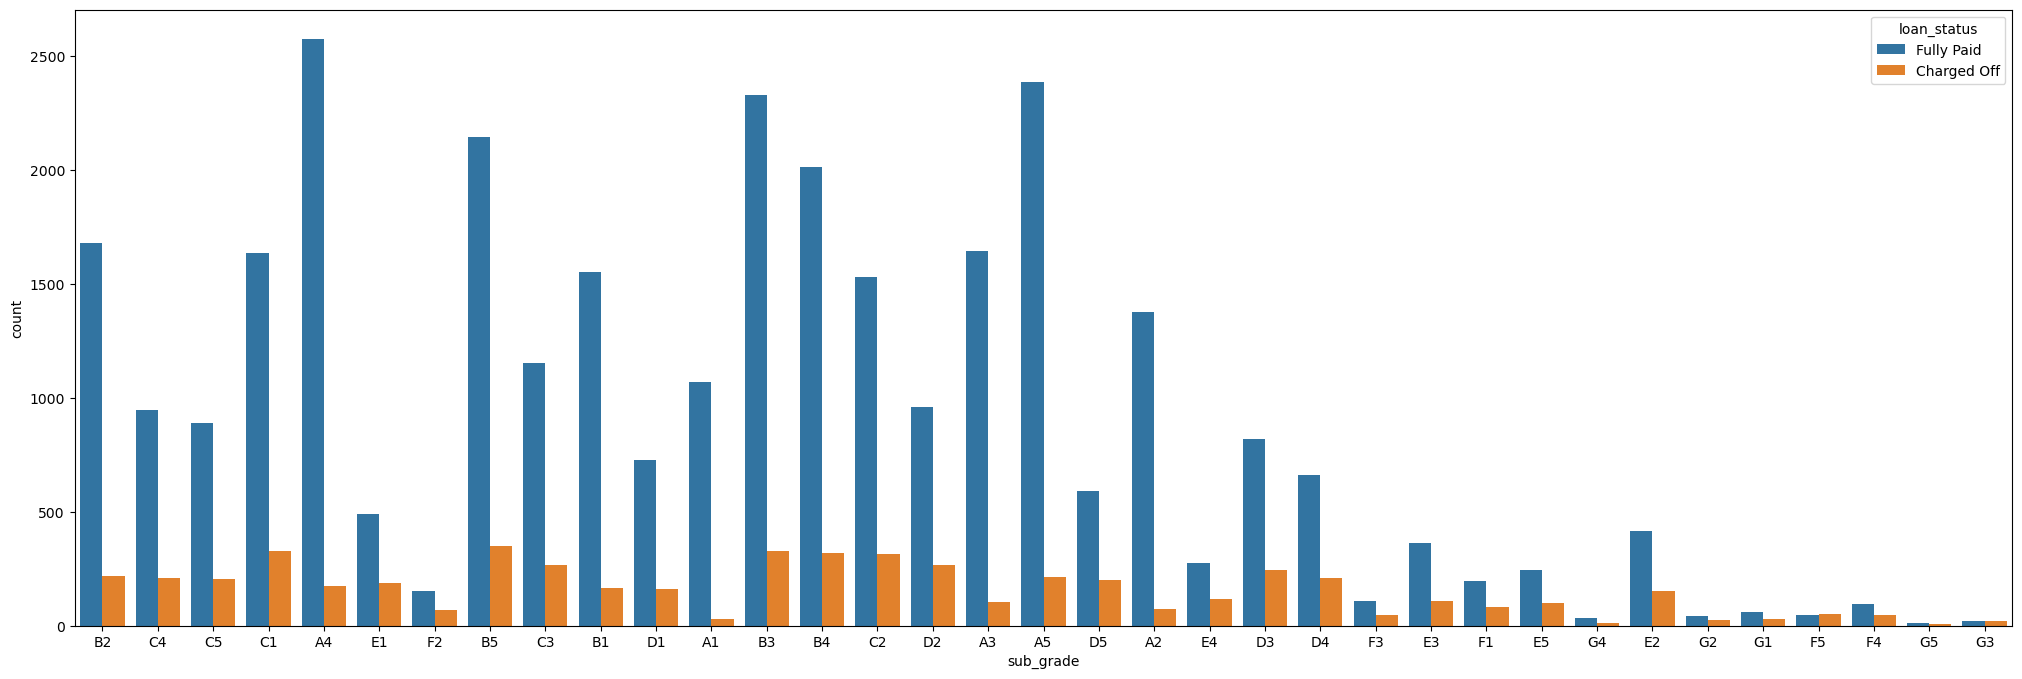

In [189]:
# see the count plot for sub-grades
fig, ax = plt.subplots(figsize = (25,8))
sns.countplot(x = 'sub_grade', hue='loan_status', data = loan_data_df)

Observation (Grade & Sub-Grades) : 
- No specific relation in the sub grades
- But in Grades can see B , C , D , E have higher data indicating loans which are charged off

Employee Tenure

Employee Tenure w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='emp_length', ylabel='count'>

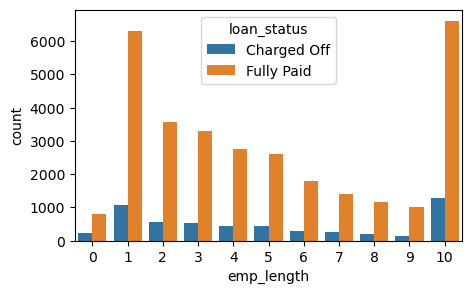

In [190]:
# see the count plot for employee tenure
plt.figure(figsize=(5,3))
sns.countplot(x = 'emp_length', hue='loan_status', data = loan_data_df)

<Axes: xlabel='emp_length', ylabel='count'>

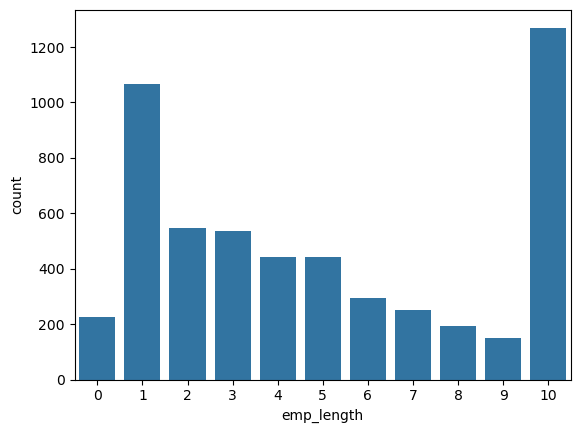

In [191]:
# see the count plot for employee tenure for charged off loan
sns.countplot(x = 'emp_length', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])

Observation (Employee Tenure) : 
- Data depicts employee with tenure between 0-1 and 10 or higher have larg defaulting (charged off) loans as compared to others

Loan Amount

<Axes: xlabel='loan_amnt', ylabel='count'>

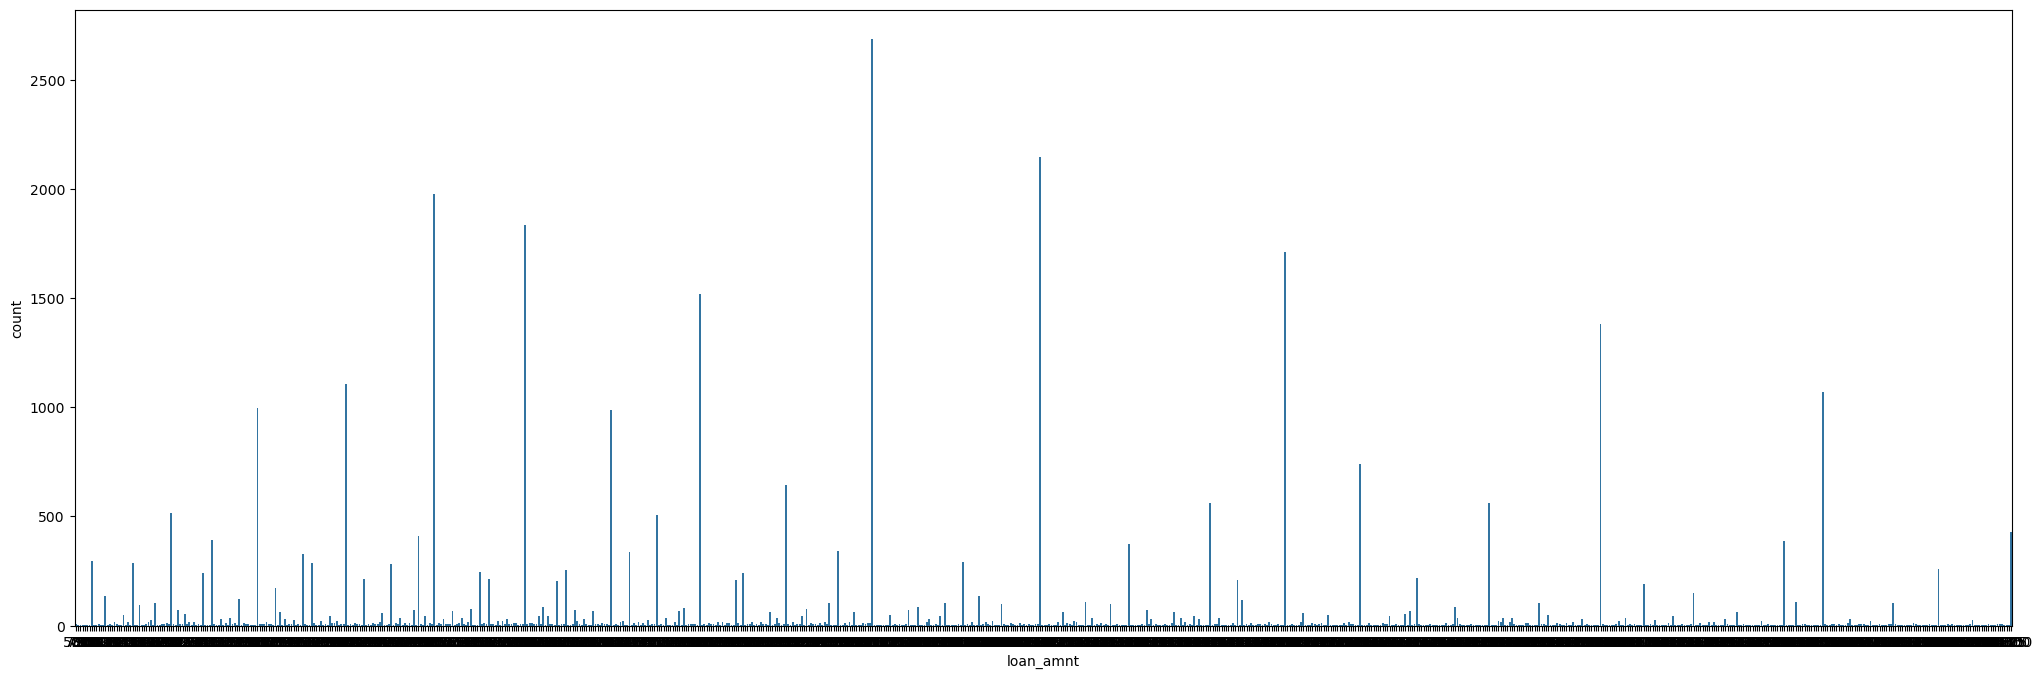

In [192]:
# see the count plot for employee tenure
fig, ax = plt.subplots(figsize = (25,8))
sns.countplot(x = 'loan_amnt', data = loan_data_df)

#limit data to 10
#sns.countplot(x = 'loan_amnt', data = loan_data_df, order=loan_data_df.loan_amnt.value_counts().iloc[:10].index)

[Text(0.5, 1.0, 'Loan Amount - Distribution Plot'),
 Text(0.5, 0, 'Loan Amount')]

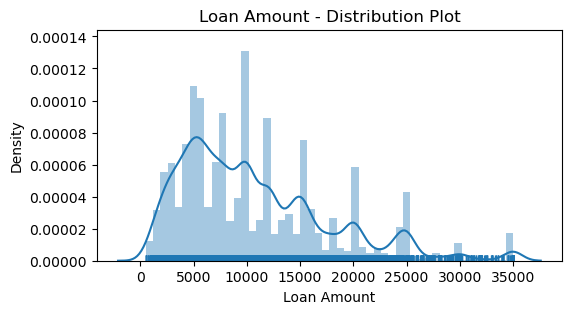

In [193]:
# As data is large and distributed for loan_amount lets see distribution plot
plt.figure(figsize=(6,3))
ax=sns.distplot(loan_data_df['loan_amnt'],rug=True)
ax.set(title='Loan Amount - Distribution Plot',xlabel='Loan Amount')

Observation (Loan Amount) : 
- Individual Loan amount data is dipcting nothing for any factor to loan being default
- but the data distribuyion shows that majorly loan from 5000-15000 are more

Loan Term

Loan Term w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='term', ylabel='count'>

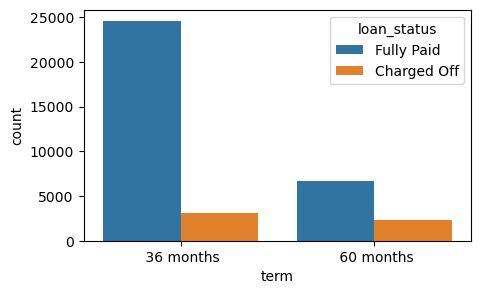

In [194]:
# see the count plot for loan term
plt.figure(figsize=(5,3))
sns.countplot(x = 'term', hue='loan_status', data = loan_data_df)

<Axes: xlabel='term', ylabel='count'>

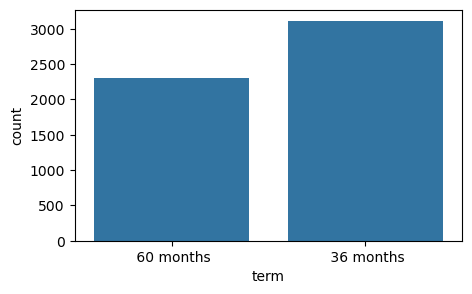

In [195]:
# see the count plot for loan term
plt.figure(figsize=(5,3))
sns.countplot(x = 'term', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])


Observation (Loan Term) : Loan term with 3 yrs duration have more defaulters, but they even have large amount of fully paid as well, so the data individually is not dipcting any pattern and data set for 3yrs are larger i.e people tend to have loans more for 3yrs (36 months)

Interest Rates

<Axes: xlabel='int_rate', ylabel='count'>

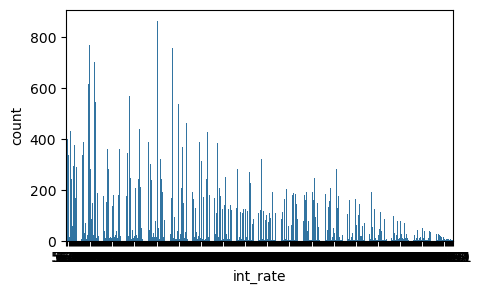

In [196]:
# see the count plot for interest rate
plt.figure(figsize=(5,3))
sns.countplot(x = 'int_rate', data = loan_data_df)

[Text(0.5, 1.0, 'Interest Rate - Distribution Plot'),
 Text(0.5, 0, 'Interest Rate')]

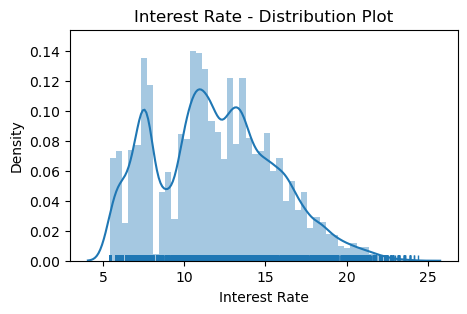

In [197]:
#Again values are large and distributed lets see distribution plot
plt.figure(figsize=(5,3))
ax=sns.distplot(loan_data_df['int_rate'],rug=True)
ax.set(title='Interest Rate - Distribution Plot',xlabel='Interest Rate')

Observation (Interest Rate) : 
Individually  interset rate distribution is not showing any pattern. But from data it is evident that loans with 8-15% are in larger number , while higher interest rate loans have less count in data set

Loan Verification Status

Loan Verification status w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='verification_status', ylabel='count'>

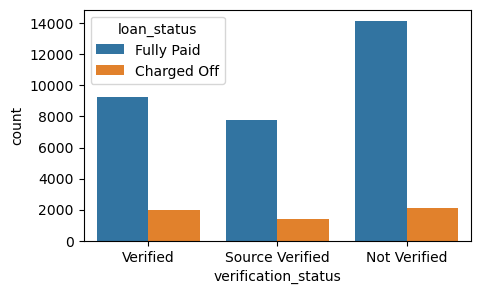

In [198]:
# see the count plot for verification status
plt.figure(figsize=(5,3))
sns.countplot(x = 'verification_status', hue='loan_status', data = loan_data_df)

<Axes: xlabel='verification_status', ylabel='count'>

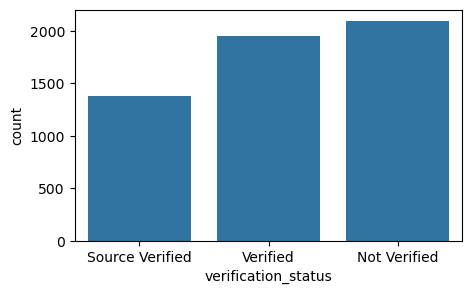

In [199]:
# see the count plot for verification status
plt.figure(figsize=(5,3))
sns.countplot(x = 'verification_status', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])

Observation (Loan Verification Status) : 
- Clearly evident that non verified loans are more to be defaulted
- But even verified loans have quite a high number

Home Ownership

<Axes: xlabel='home_ownership', ylabel='count'>

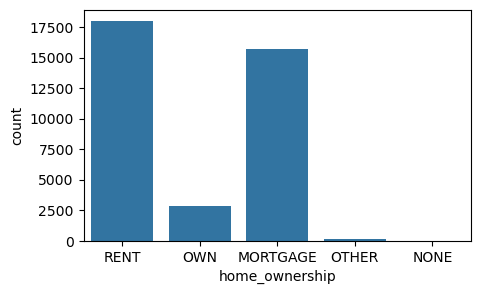

In [200]:
# see the count plot for home ownership
plt.figure(figsize=(5,3))
sns.countplot(x = 'home_ownership', data = loan_data_df)

Home Ownership w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='home_ownership', ylabel='count'>

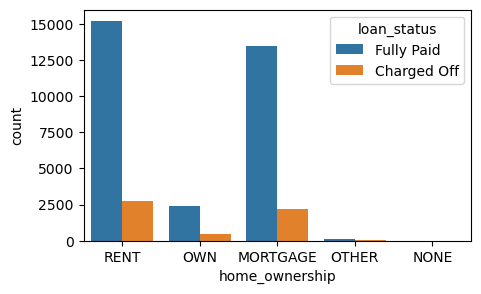

In [201]:
# see the count plot for home ownership
plt.figure(figsize=(5,3))
sns.countplot(x = 'home_ownership', hue='loan_status', data = loan_data_df)

<Axes: xlabel='home_ownership', ylabel='count'>

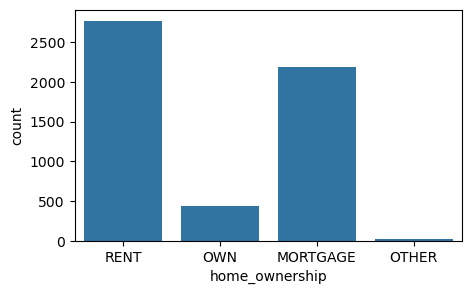

In [202]:
# see the count plot for home ownership
plt.figure(figsize=(5,3))
sns.countplot(x = 'home_ownership', data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])

Observation (Home Ownership) : 
- Data set shows most of the people getting loans are staying either in rented or mortgage accomodations
- As applicants in these areas are high so their number is high for both "fully paid" and "charged off"

Annual Income breakup

<Axes: xlabel='annual_inc', ylabel='count'>

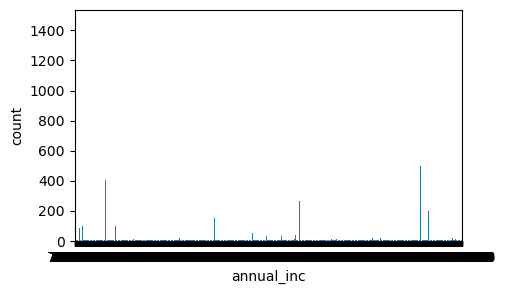

In [203]:
# see the count plot for annual income
plt.figure(figsize=(5,3))
sns.countplot(x = 'annual_inc', data = loan_data_df)

[Text(0.5, 1.0, 'Annual Income - Distribution Plot'),
 Text(0.5, 0, 'Annual Income')]

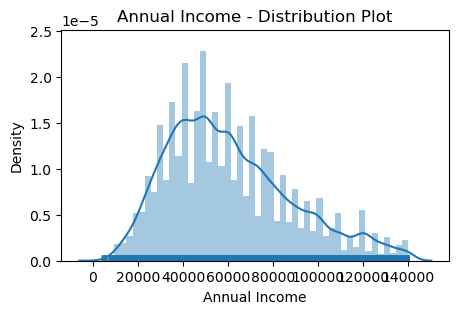

In [204]:
#Again values are large and distributed lets see distribution plot
plt.figure(figsize=(5,3))
ax=sns.distplot(loan_data_df['annual_inc'],rug=True)
ax.set(title='Annual Income - Distribution Plot',xlabel='Annual Income')

Observation (Annual Income) : 
Data distributon shows that people having income in range of 30000 - 80000 have more tendency for loans

Purpose for which loan was taken

Loan Purpose w.r.t Loanstatus i.e with hue (loan_status)

<Axes: xlabel='purpose', ylabel='count'>

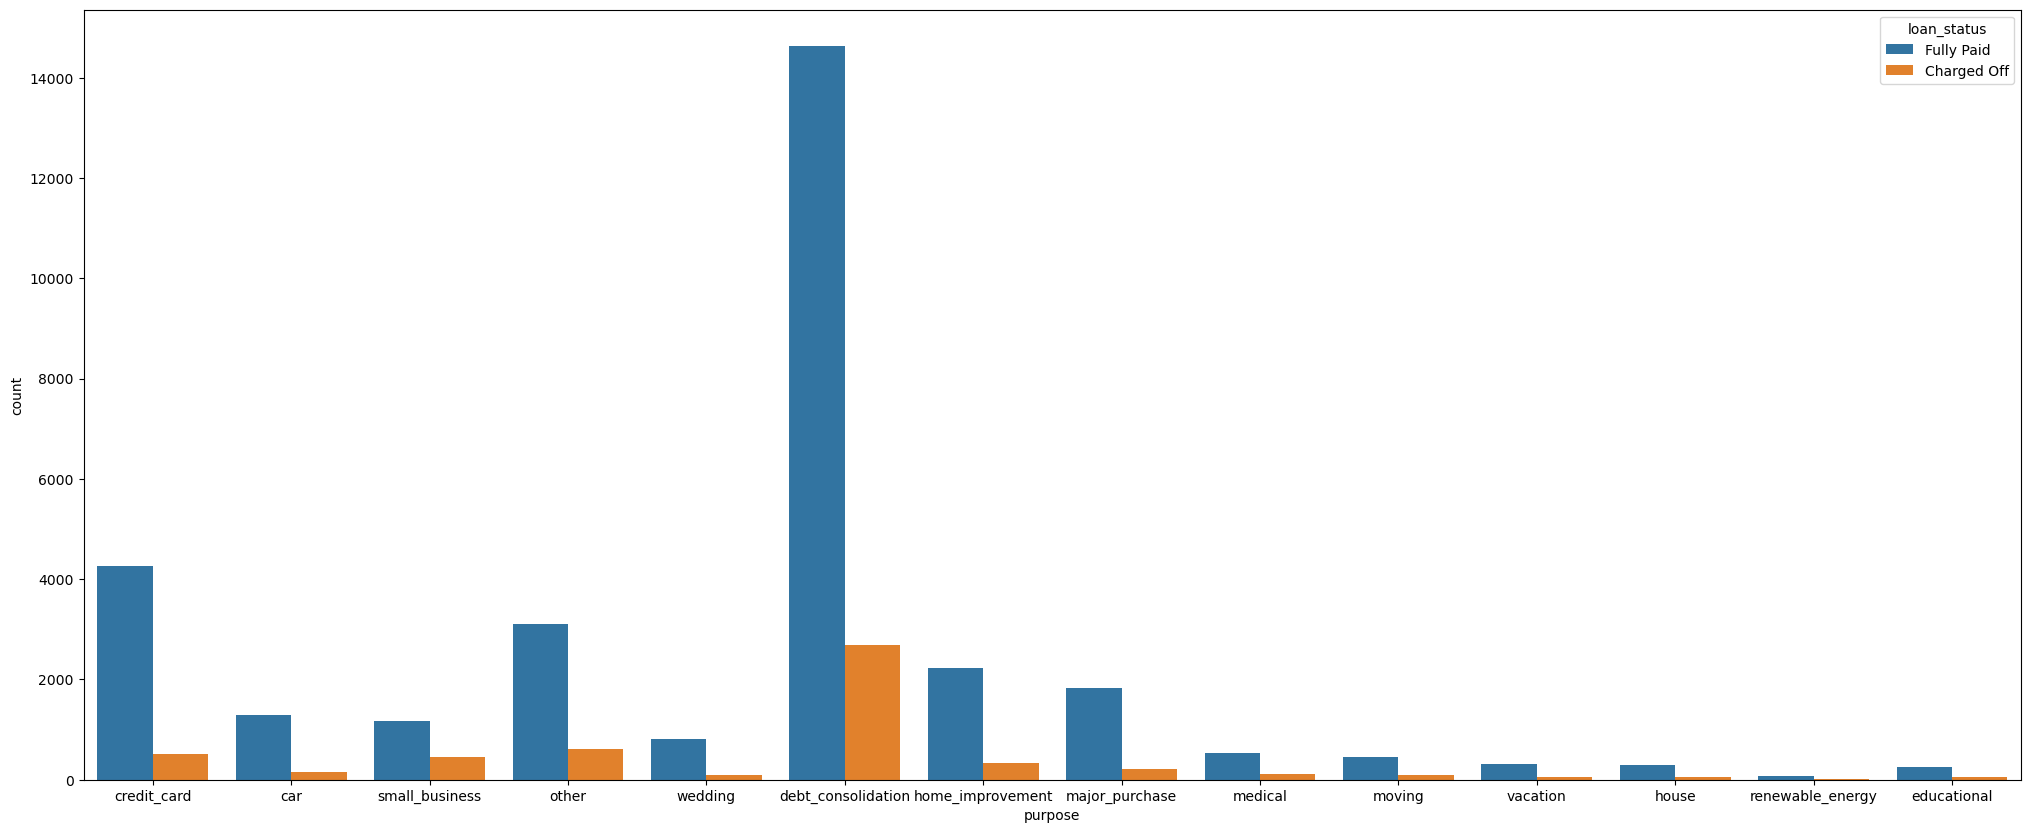

In [205]:
# see the count plot for purpose status
fig, ax = plt.subplots(figsize = (25,10))
sns.countplot(x = 'purpose', hue='loan_status', data = loan_data_df)

<Axes: xlabel='purpose', ylabel='count'>

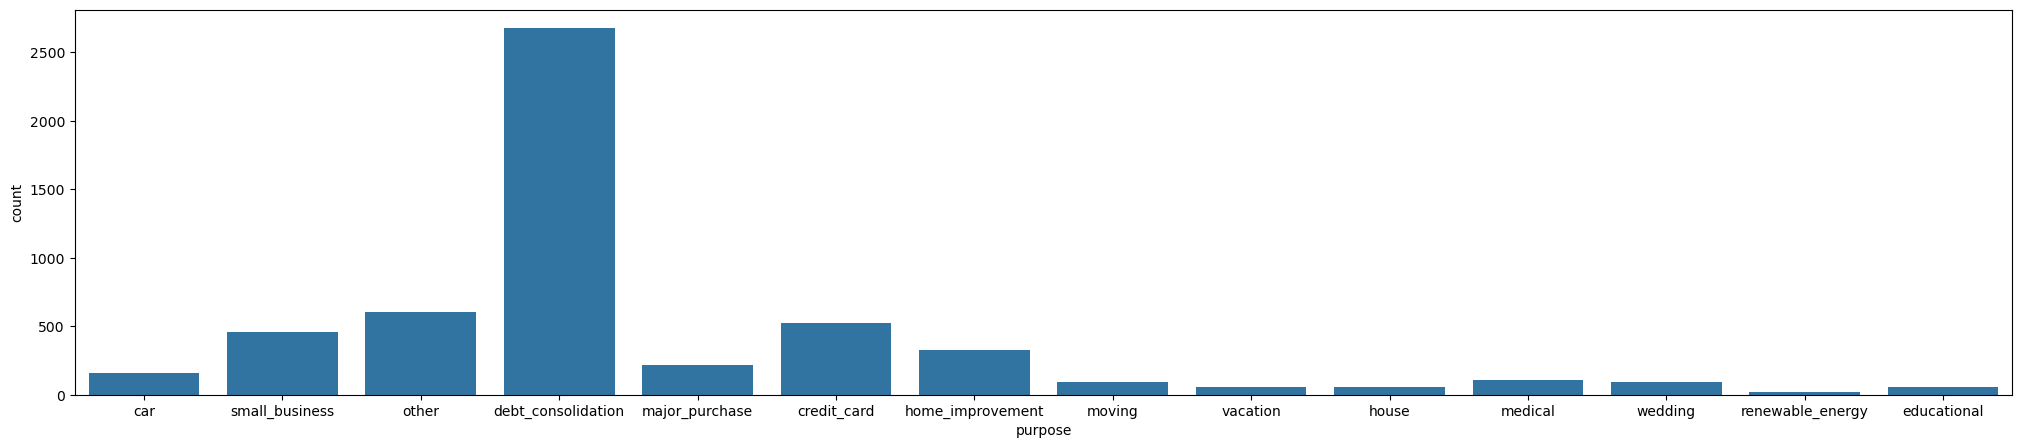

In [206]:
# see the count plot for purpose status
fig, ax = plt.subplots(figsize = (25,5))
sns.countplot(x = 'purpose',data = loan_data_df[loan_data_df['loan_status']=='Charged Off'])

In [207]:
loan_data_df['purpose'].value_counts()

purpose
debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: count, dtype: int64

Observation (Loan Purpose) : 
- Analyzing Loan Purpose shows lot of people having loans for following : debt collection, credit card, small business, home improvement, major purchases
- Number of charge off and fully paid is also high for debt collection > credit card > small business

Loan Status w.r.t to issue month

In [208]:
## Extracting month and year
df_issue_date = loan_data_df['issue_d'].str.partition("-", True)     
loan_data_df['issue_month'] = df_issue_date[0]                       
loan_data_df['issue_year'] = '20' + df_issue_date[2]

In [209]:
loan_data_df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,issue_month,issue_year
0,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NA,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70,9,f,0.0,0.0,5863.155187,5833.84,5000.00,863.16,0.00,0.00,Jan-15,171.62,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,Dec,2011
1,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,1,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,Apr-13,119.66,Sep-13,0.0,INDIVIDUAL,0,0.0,0,0.0,Dec,2011
2,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NA,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50,10,f,0.0,0.0,3005.666844,3005.67,2400.00,605.67,0.00,0.00,Jun-14,649.91,May-16,0.0,INDIVIDUAL,0,0.0,0,0.0,Dec,2011
3,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21,37,f,0.0,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,Jan-15,357.48,Apr-16,0.0,INDIVIDUAL,0,0.0,0,0.0,Dec,2011
5,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,Veolia Transportaton,3,RENT,36000.0,Source Verified,Dec-11,Fully Paid,n,wedding,My wedding loan I promise to pay back,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30,12,f,0.0,0.0,5632.210000,5632.21,5000.00,632.21,0.00,0.00,Jan-15,161.03,Jan-16,0.0,INDIVIDUAL,0,0.0,0,0.0,Dec,2011


<Axes: xlabel='issue_month', ylabel='count'>

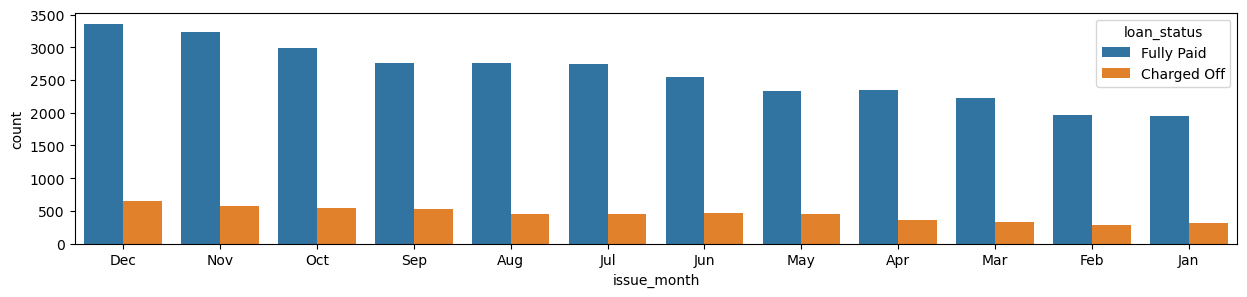

In [210]:
plt.figure(figsize=(15,3))
sns.countplot(x='issue_month', hue='loan_status', data=loan_data_df)


<Axes: xlabel='issue_year', ylabel='count'>

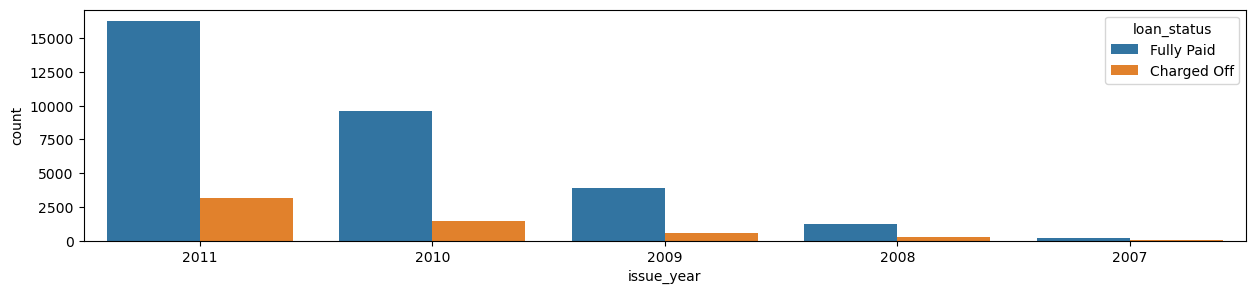

In [211]:
plt.figure(figsize=(15,3))
sns.countplot(x='issue_year', hue='loan_status', data=loan_data_df)

Observation (w.r.t month & year) :
- Most loans are granted in Dec
- Number of loans issued have gradullay increased across year 2011 > 2010 > 2009 > 2008 > 2007
- As more loans were issued in 2011 and Dec time frame so we can see large number of both "Fully Paid" & "Charged Off" loans

After seeing the various data counts and univariat analysis we can say following from the data set that there is slight more probability of defaulting loans for
- People having employment in either in 0-1 yr or 10 yr or above
- People getting loan are in GRADE B or C
- When loan term is 3 yrs
- When loans are NOT VERIFIED
- People having RENTED/MORTGAED accomodation
- Loan issued during year end Nov-Dec
- People using loans for clear debt collections


BiVariate Analysis

<Axes: >

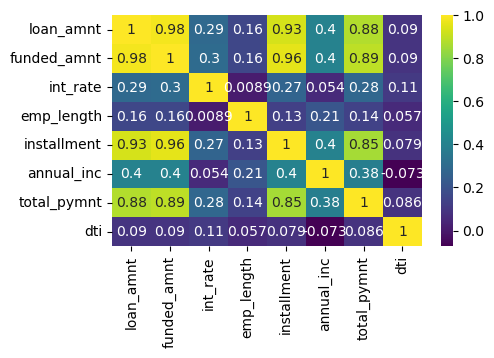

In [212]:
#loan_correlation = loan_data_df.corr()
#plt.figure(figsize=(12, 8))
#sns.heatmap(loan_data_df.corr(), annot=True, cmap='viridis')

columns_for_correlation = ['loan_amnt','funded_amnt',
                           'int_rate', 'emp_length',
                           'installment','annual_inc','total_pymnt', 'dti']
#loan_correlation=loan_data_df[columns_for_correlation].corr()
#loan_correlation
plt.figure(figsize=(5, 3))
sns.heatmap(loan_data_df[columns_for_correlation].corr(), annot=True, cmap='viridis')

Observations: 
- Loan Amount is positively correlated to funded amount and installemnets i.e higher the loan amount , higher is funded amount and installments
- Annual income and employment length are positively correlated i.e higher the employment length higher the annual income
- Annual income and Debt to income are negatively correlated i.e higher the annual income lower is Debt to income ratio

In [213]:
#print(loan_data_df.annual_inc.max() - loan_data_df.annual_inc.min())

Create bins for annual_inc_categories

In [214]:
#Creating Bins for further analysis
#Creating categories for loan amounts for further bivariate analysis, considering data there can be 5 equal labels of 7000 each
#loan_data_df['loan_amnt_groups'] = pd.cut(loan_data_df['loan_amnt'], bins=7,precision =0,labels=['0-5k','5k-10k','10k-15k','15k-20k','20k-25k','25k-30k','30k-35k'])
loan_data_df['loan_amnt_groups']=pd.cut(loan_data_df['loan_amnt'],[0,7000,14000,21000,28000,35000],labels=['0-7000','7000-14000','14000-21000','21000-28000','28000'])

#Creating categories for annual incomes for further bivariate analysis, 
loan_data_df['annual_inc_categories']=pd.cut(loan_data_df['annual_inc'],[0,20000,40000,60000,80000,1000000],labels=['0-20000','20000-40000','40000-60000','60000-80000','80000+'])

#Creating categories for interest rates for further bivariate analysis
loan_data_df['interest_rate_categories']=pd.cut(loan_data_df['int_rate'],[0,10,12.5,16,20],labels=['0-10','10-13','12.5-16','16+'])

#Creating dti into buckets for further bivariate analysis
loan_data_df['dti_categories']=pd.cut(loan_data_df['dti'],[0,5,10,15,20,25],labels=['0-5','5-10','10-15','15-20','25+'])

In [234]:
#Annual income vs charged off loans
annualIncome_vs_chargedloan = loan_data_df.groupby(['annual_inc_categories', 'loan_status']).loan_status.count().unstack().fillna(0).reset_index()
annualIncome_vs_chargedloan['Total'] = annualIncome_vs_chargedloan['Charged Off'] + annualIncome_vs_chargedloan['Fully Paid'] 
annualIncome_vs_chargedloan['Chargedoff_Proportion'] = annualIncome_vs_chargedloan['Charged Off'] / annualIncome_vs_chargedloan['Total']
annualIncome_vs_chargedloan.sort_values('Chargedoff_Proportion', ascending=False)

loan_status,annual_inc_categories,Charged Off,Fully Paid,Total,Chargedoff_Proportion
0,0-20000,132,580,712,0.185393
1,20000-40000,1127,5130,6257,0.180118
2,40000-60000,1361,7391,8752,0.155507
3,60000-80000,834,5272,6106,0.136587
4,80000+,735,5751,6486,0.113321


Text(0, 0.5, 'Annual Income')

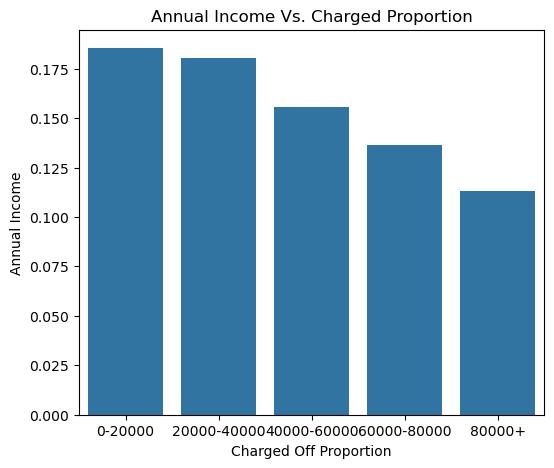

In [239]:
#Drawing Barplots
fig,axis=plt.subplots(figsize=(6,5))
axis.set(title='Annual Income Vs. Charged Proportion')
axis=sns.barplot(x='annual_inc_categories',y='Chargedoff_Proportion',data=annualIncome_vs_chargedloan)
axis.set_xlabel('Charged Off Proportion')
axis.set_ylabel('Annual Income')

Segmented Analysis

We'll analyze "loanstatus" w.r.t "Purpose" for which loan was issued and then we'll pick the top 5 out of those

In [216]:
# Do segmented analysis for loan purpose vs loan status
loan_data_df['loan_status_new'] = loan_data_df['loan_status']
loan_data_df['loan_status_new'] = loan_data_df['loan_status_new'].apply(lambda x: 0 if x=='Fully Paid' else 1)
loan_data_df['loan_status_new'] = loan_data_df['loan_status_new'].apply(lambda x: pd.to_numeric(x))


In [217]:
count_fully_paid = loan_data_df['loan_status'].value_counts().get('Fully Paid')
print(count_fully_paid)
count_chargedOff = loan_data_df['loan_status'].value_counts().get('Charged Off')
print(count_chargedOff)

31236
5418


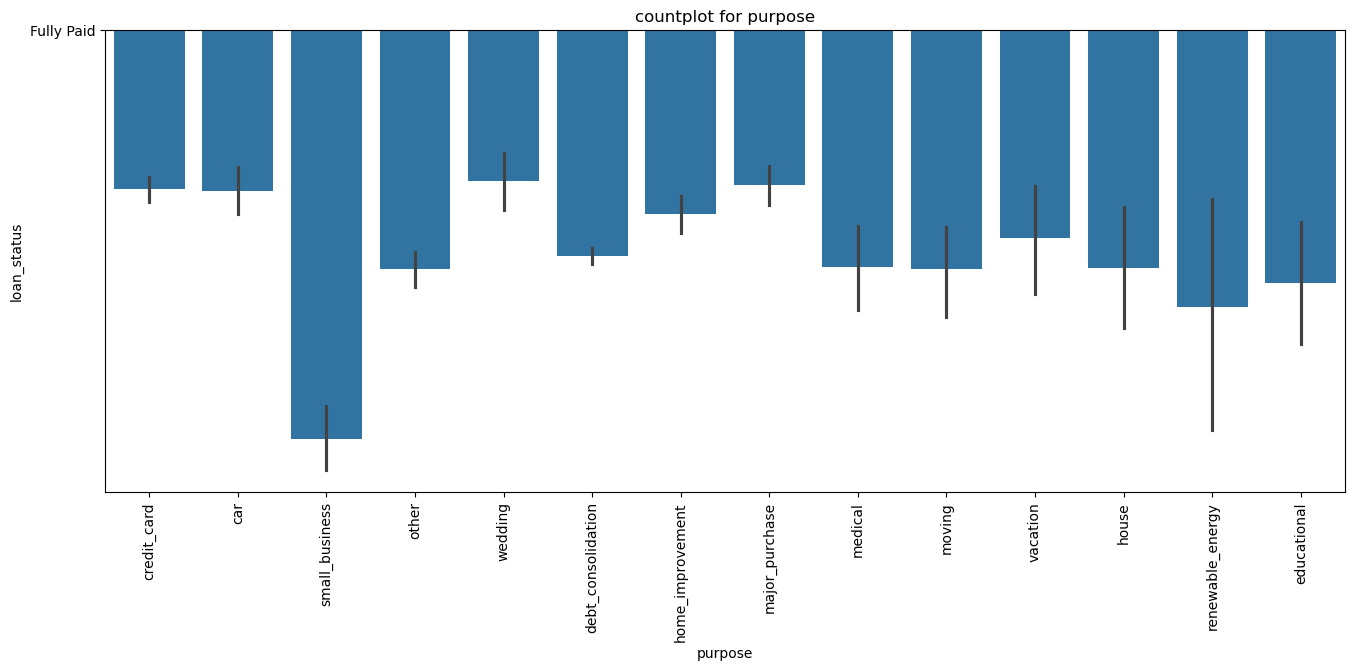

In [218]:
# Draw plot
title = "countplot for purpose"
plt.figure(figsize=(16, 6))
plt.xticks(rotation=90)
plt.title(title)
#loan_data_df_data = loan_data_df[loan_data_df['loan_status']=='Charged Off']
loan_data_df_data = loan_data_df
sns.barplot(x='purpose', y='loan_status', data=loan_data_df_data)
plt.show()

In [219]:
loan_data_df['purpose'].value_counts()

purpose
debt_consolidation    17305
credit_card            4783
other                  3699
home_improvement       2556
major_purchase         2046
small_business         1623
car                    1448
wedding                 893
medical                 641
moving                  550
vacation                365
house                   338
educational             312
renewable_energy         95
Name: count, dtype: int64

With the above anlysis we can see top 5 are following :
- "credit_card","small_business","debt_consolidation","home_improvement","major_purchase" are the areas where we have larger data set that more people are taking loans for these areas , and out of this we see debt consolidation has larger data set


In [220]:
# Remove month from the term so that this can used in correlation
loan_data_df['term'] = loan_data_df.term.str.rsplit(n=1).str[0]
loan_data_df['term']

0         36
1         60
2         36
3         36
5         36
        ... 
39711     36
39712     36
39713     36
39714     36
39716     36
Name: term, Length: 36654, dtype: object

We'll analyze now these core 5 areas

In [221]:
#main_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase", 'renewable_energy', 'educational']
main_purposes = ["credit_card","small_business","debt_consolidation","home_improvement","major_purchase"]
loan_data_df = loan_data_df[loan_data_df['purpose'].isin(main_purposes)]

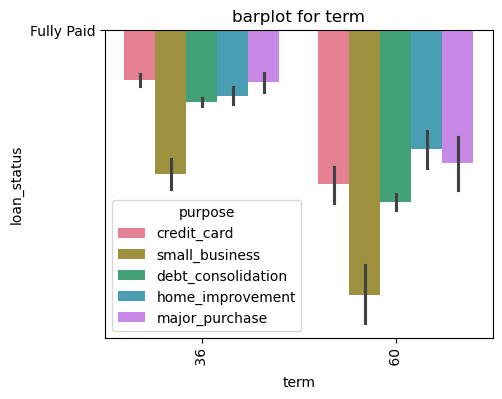

In [222]:
# Draw plot for these 5 purpose with term
plt.figure(figsize=(5, 4))
plt.xticks(rotation=90)
title = "barplot for term"
plt.title(title)
loan_data_df_data = loan_data_df
#loan_data_df_data = loan_data_df[loan_data_df['loan_status']=='Charged Off']
sns.barplot(x='term', y='loan_status', hue='purpose', data=loan_data_df_data, palette = "husl")
plt.show()  

Observation : 
- small business has the most loans defualts, followed by renewable energy and education.
- and small business in 5 yr duration

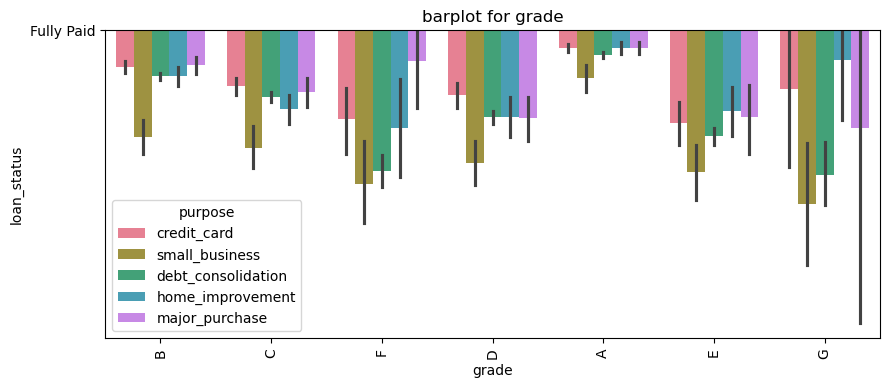

In [223]:
# Draw plot for these 5 purpose with grade
plt.figure(figsize=(10, 4))
plt.xticks(rotation=90)
title = "barplot for grade"
plt.title(title)
loan_data_df_data = loan_data_df
#loan_data_df_data = loan_data_df[loan_data_df['loan_status']=='Charged Off']
sns.barplot(x='grade', y='loan_status', hue='purpose', data=loan_data_df_data, palette = "husl")
plt.show() 

Observation : 
- small business across grades have more defaulters
- The order of default in small business across grade F > G > E > D > C > B
- Whereas Grade F seems to be having high default across small business, debt collection, home improvement and credit card


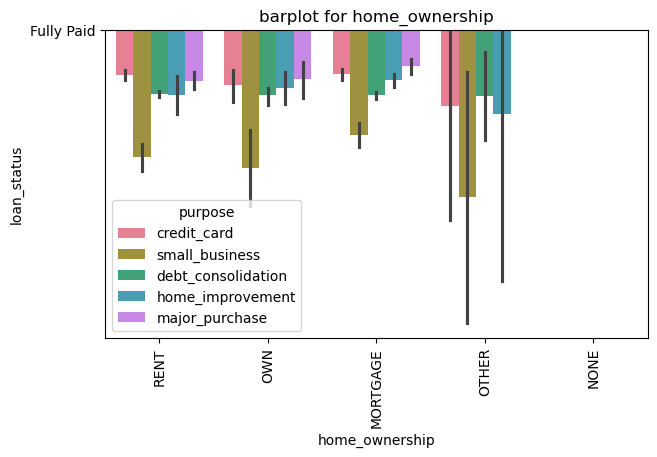

In [224]:
# Draw plot for these 5 purpose with home ownership
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "barplot for home_ownership"
plt.title(title)
loan_data_df_data = loan_data_df
#loan_data_df_data = loan_data_df[loan_data_df['loan_status']=='Charged Off']
sns.barplot(x='home_ownership', y='loan_status', hue='purpose', data=loan_data_df_data, palette = "husl")
plt.show()

Observation : 
- small business across OWNED > RENTED > MORTGAGE have more defaulters
- In case of OWNED --> Small business > debt collection > home improvement
- In case of RENTED --> Small business > home improvement > debt collection
- In case of MORTGAGE --> Small business > debt collection > home improvement

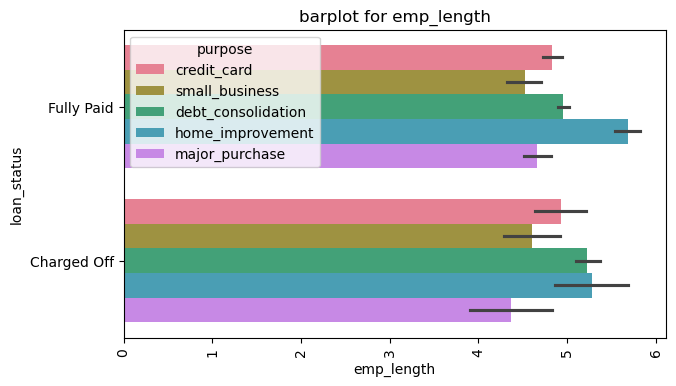

In [225]:
# Draw plot for these 5 purpose with emp length
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "barplot for emp_length"
plt.title(title)
loan_data_df_data = loan_data_df
#loan_data_df_data = loan_data_df[loan_data_df['loan_status']=='Charged Off']
sns.barplot(x='emp_length', y='loan_status', hue='purpose', data=loan_data_df_data, palette = "husl")
plt.show()

Observation :
- Larger the employee tenure the charged off loans get higher tendency for loans in home improvement > debt collection > small business

We'll create segments/bins for various field like
- loan amount
- interest rate
- annual income
- dti i.e debt to income ratio

Loan amount

In [226]:
# we can see 3 areas of loam amount 0-5, 5-10, 10-15, 15-20, 20-25, 25-30, 30-35
# so we can have low 0-10 , medium 10-20. high 20-35
def func_loan_amount_binning(loan_amount_value):
  if loan_amount_value < 10000:
      return 'low'
  elif loan_amount_value >=10000 and loan_amount_value < 20000:
      return 'medium'
  else:
      return 'high'

loan_data_df['loan_amnt'] = loan_data_df['loan_amnt'].apply(lambda x: func_loan_amount_binning(x))

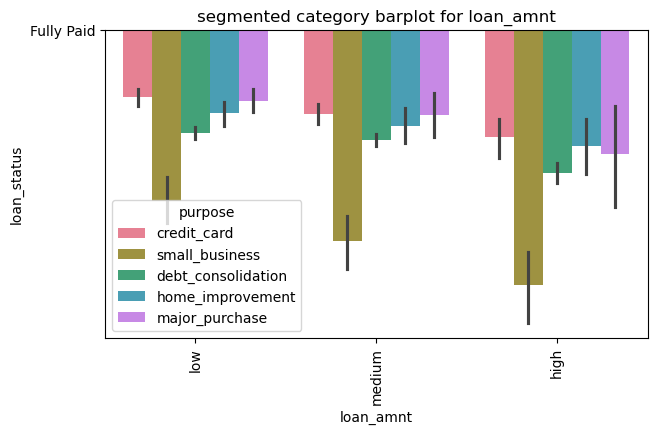

In [227]:
#plot graph
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "segmented category barplot for loan_amnt"
plt.title(title)
sns.barplot(x='loan_amnt', y='loan_status', hue='purpose', data=loan_data_df, palette = "husl")
plt.show()

Observation:
- Again the overall defaults in "small business" is high in "loan amount" category in order of HIGH > MEDIUM > LOW
- Second defaulting category is "debt_colletion" in "loan amount" category with following order HIGH > MEDIUM > LOW

Interest Rate

In [228]:
# we can see 3 areas of interest rate 0-5, 5-10, 10-15, 15-20, 20-25
# so we can have low 0-10 , medium 10-15. high 15-25
def func_interest_rate_binning(interest_rate_value):
    if interest_rate_value <= 10:
        return 'low'
    elif interest_rate_value > 10 and interest_rate_value <=15:
        return 'medium'
    else:
        return 'high'
    
loan_data_df['int_rate'] = loan_data_df['int_rate'].apply(lambda x: func_interest_rate_binning(x))

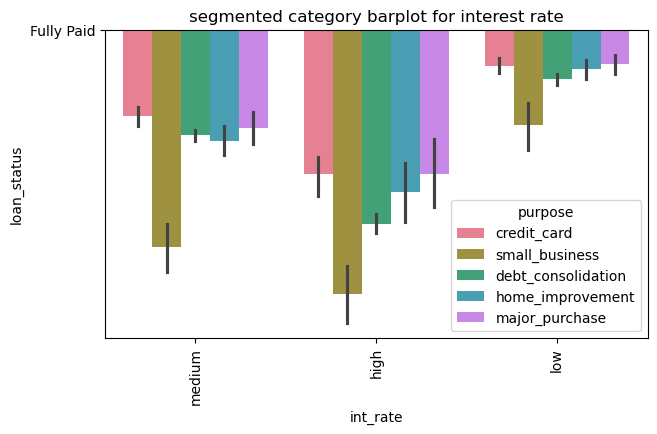

In [229]:
#plot graph
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "segmented category barplot for interest rate"
plt.title(title)
sns.barplot(x='int_rate', y='loan_status', hue='purpose', data=loan_data_df, palette = "husl")
plt.show()

Observation:
- Again the overall defaults in "small business" is high in "interest rate" category category HIGH > MEDIUM > LOW
- Second defaulting category is "debt_colletion" in "interest rate" category with following order HIGH > MEDIUM > LOW

Annual Income

In [230]:
# we can see 3 areas of interest rate 0-50000, 50000-100000, 100000-150000
# so we can have low 0-50000 , medium 50000-100000. high 100000-150000
def func_annual_income_binning(annual_income_value):
    if annual_income_value <= 50000:
        return 'low'
    elif annual_income_value > 50000 and annual_income_value <=100000:
        return 'medium'
    else:
        return 'high'
    
loan_data_df['annual_inc'] = loan_data_df['annual_inc'].apply(lambda x: func_annual_income_binning(x))

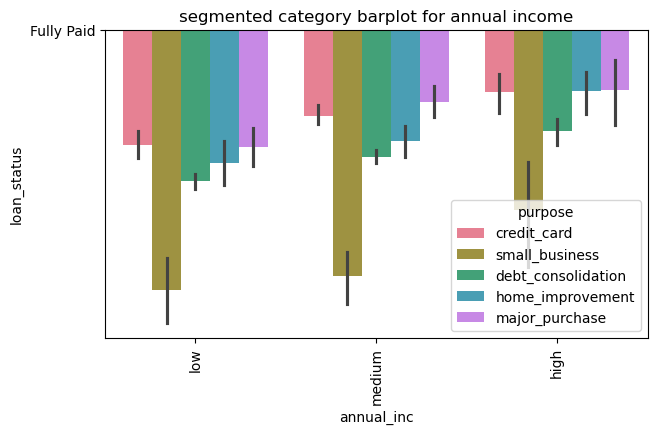

In [231]:
#plot graph
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "segmented category barplot for annual income"
plt.title(title)
sns.barplot(x='annual_inc', y='loan_status', hue='purpose', data=loan_data_df, palette = "husl")
plt.show()

Observation:
- Again the overall defaults in "small business" is high in "annual income" category LOW > MEDIUM > HIGH
- Second defaulting category is "debt_colletion" in "annual income" category with following order LOW > MEDIUM > HIGH

DTI (debt to income ratio)

In [232]:
# we can see 3 areas of interest rate 0-10, 10-20, 20-30
# so we can have low 0-10 , medium 10-20. high 20-30
def func_dti_binning(dti_value):
    if dti_value <= 10:
        return 'low'
    elif dti_value > 10 and dti_value <=20:
        return 'medium'
    else:
        return 'high'
    

loan_data_df['dti'] = loan_data_df['dti'].apply(lambda x: func_dti_binning(x))

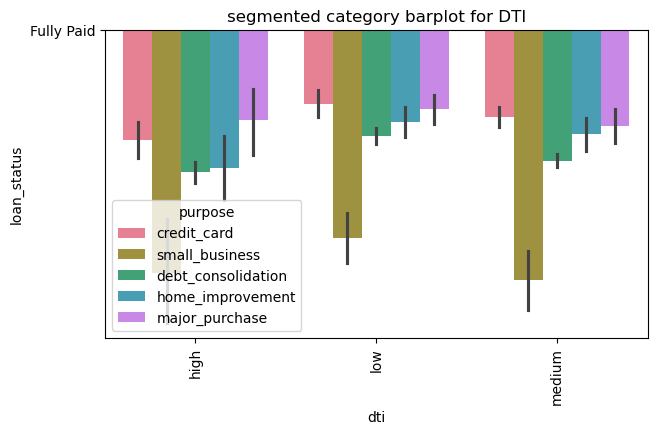

In [233]:
#plot graph
plt.figure(figsize=(7, 4))
plt.xticks(rotation=90)
title = "segmented category barplot for DTI"
plt.title(title)
sns.barplot(x='dti', y='loan_status', hue='purpose', data=loan_data_df, palette = "husl")
plt.show()

Observation:
- Again the overall defaults in "small business" is high in "DTI" category category HIGH > MEDIUM > LOW
- Second defaulting category is "debt_colletion" in "DTI" category with following order HIGH > MEDIUM > LOW